# COMP 526 Final Project

In [1]:
# Project Members: Dhru Patel, Austin Joiner, Chris Leonard, Sumit Chandra

# Import Dataset and Pre-Process Data

In [2]:
#Important Required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

In [3]:
#Get DataSet and Pre-Process Data
ball = pd.read_csv('players_stats.csv', sep=',')

ball.loc[ball['Pos'] == 'PG', 'Position'] = 1
ball.loc[ball['Pos'] == 'SG', 'Position'] = 2
ball.loc[ball['Pos'] == 'SF', 'Position'] = 3
ball.loc[ball['Pos'] == 'PF', 'Position'] = 4
ball.loc[ball['Pos'] == 'C', 'Position'] = 5
ball = ball[pd.notnull(ball['Position'])]

ball['Height'] = ball['Height'].astype(int)
ball['Weight'] = ball['Weight'].astype(int)

ball.head()
ball.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 489
Data columns (total 35 columns):
Name            422 non-null object
Games Played    422 non-null int64
MIN             422 non-null int64
PTS             422 non-null int64
FGM             422 non-null int64
FGA             422 non-null int64
FG%             422 non-null float64
3PM             422 non-null int64
3PA             422 non-null int64
3P%             422 non-null float64
FTM             422 non-null int64
FTA             422 non-null int64
FT%             422 non-null float64
OREB            422 non-null int64
DREB            422 non-null int64
REB             422 non-null int64
AST             422 non-null int64
STL             422 non-null int64
BLK             422 non-null int64
TOV             422 non-null int64
PF              422 non-null int64
EFF             422 non-null int64
AST/TOV         422 non-null float64
STL/TOV         422 non-null float64
Age             422 non-null float64
Birth_P

In [4]:
#Seperate dataset as response and feature variables
#Data Set for only Height and Weight as Features
X = ball.drop(['Pos', 'Collage', 'Birthdate', 'Birth_Place', 'Team', 'Name', 'Age', 'Experience', 'BMI', 'FG%', '3P%', 'FT%', 'AST/TOV','STL/TOV', 'Position', 'Games Played', 'MIN', 'PTS', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'EFF'], axis=1)
#Data Set for All Stats except non-integer values
#X = ball.drop(['Pos', 'Collage', 'Birthdate', 'Birth_Place', 'Team', 'Name', 'Age', 'Experience', 'BMI', 'FG%', '3P%', 'FT%', 'AST/TOV','STL/TOV', 'Position', 'Games Played', 'MIN'], axis=1)
#X = ball.loc[ball['Height', 'Weight']]
y = ball['Position']


#Checking Nulls
X.isnull().sum()
y.isnull().sum()


0

In [5]:
#Train and Test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
#Check Shape of Data 
X_test.shape,X_train.shape, y_train.shape, y_test.shape



((85, 2), (337, 2), (337,), (85,))

In [6]:
#Apply standard scaleing to get optimized result
sc = StandardScaler()
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


/anaconda2/envs/comp521/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda2/envs/comp521/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda2/envs/comp521/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# Random Forest Classifier

In [7]:
#Random Forest Classifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

def plot_confusion_matrix(y_test, pred_rfc,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, pred_rfc)
    # Only use the labels that appear in the data
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           
           title=title,
           ylabel='True label',
           xlabel='Predicted label')



    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[12  5  0  0  0]
 [ 4 13  3  0  0]
 [ 0  4  7  1  0]
 [ 0  0  5 11  6]
 [ 0  0  1  5  8]]
Normalized confusion matrix
[[0.70588235 0.29411765 0.         0.         0.        ]
 [0.2        0.65       0.15       0.         0.        ]
 [0.         0.33333333 0.58333333 0.08333333 0.        ]
 [0.         0.         0.22727273 0.5        0.27272727]
 [0.         0.         0.07142857 0.35714286 0.57142857]]
              precision    recall  f1-score   support

         1.0       0.75      0.71      0.73        17
         2.0       0.59      0.65      0.62        20
         3.0       0.44      0.58      0.50        12
         4.0       0.65      0.50      0.56        22
         5.0       0.57      0.57      0.57        14

   micro avg       0.60      0.60      0.60        85
   macro avg       0.60      0.60      0.60        85
weighted avg       0.61      0.60      0.60        85

[[12  5  0  0  0]
 [ 4 13  3  0  0]
 [ 0  4  7  1  0]
 [ 0  0

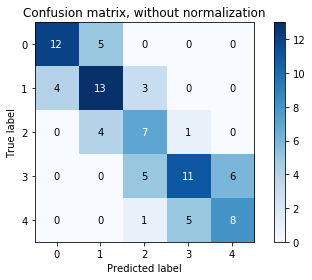

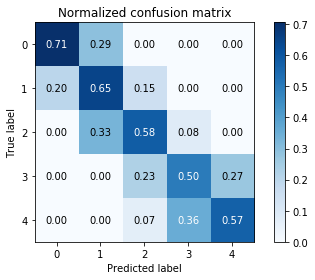

In [8]:
plot_confusion_matrix(y_test, pred_rfc,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(y_test, pred_rfc, normalize=True,
                      title='Normalized confusion matrix')
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

# SVM Classifier

AttributeError: coef_ is only available when using a linear kernel

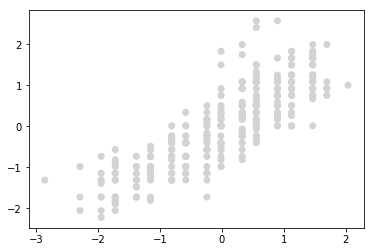

In [11]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf  = clf.predict(X_test)

# Plot data points and color using their class
color = ['black' if c == 0 else 'lightgrey' for c in y_train]
plt.scatter(X_train[:,0], X_train[:,1], c=color)

# Create the hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();


In [ ]:
#Performance of Model
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))



# Neural Network

In [12]:
mlpc = MLPClassifier(hidden_layer_sizes=(18,18,18), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [13]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix (y_test, pred_mlpc))

              precision    recall  f1-score   support

         1.0       0.81      0.76      0.79        17
         2.0       0.73      0.80      0.76        20
         3.0       0.60      0.75      0.67        12
         4.0       0.79      0.68      0.73        22
         5.0       0.77      0.71      0.74        14

   micro avg       0.74      0.74      0.74        85
   macro avg       0.74      0.74      0.74        85
weighted avg       0.75      0.74      0.74        85

[[13  4  0  0  0]
 [ 3 16  1  0  0]
 [ 0  2  9  1  0]
 [ 0  0  4 15  3]
 [ 0  0  1  3 10]]


# Accuracy of Models

In [14]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
mm = accuracy_score(y_test, pred_clf)
nm = accuracy_score(y_test, pred_mlpc)
cm, mm, nm

(0.6, 0.7176470588235294, 0.7411764705882353)